In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import seaborn as sn
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv("C:\\Users\\shred\\Desktop\\Data Science\\Assignments\\Assignment 8 - PCA\\wine.csv")

In [3]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.shape

(178, 14)

In [5]:
df["Type"].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [6]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
df.shape

(178, 14)

In [8]:
DF=df.values#numpy array

In [9]:
df_normal = scale(DF)
pca = PCA()
pca.fit_transform(df_normal)
var=pca.explained_variance_ratio_
var#The amount of variance that each PCA explains

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615,
       0.01613203, 0.01205691, 0.00925458, 0.00412945])

In [10]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1# Cumulative variance 

array([ 39.54,  57.38,  67.71,  74.34,  80.61,  85.42,  89.38,  91.88,
        93.98,  95.85,  97.46,  98.67,  99.6 , 100.01])

###### first 3 principal component scores account for 67.71% of variance

In [11]:
pca.components_

array([[ 0.39366953, -0.13632501,  0.22267638, -0.00225793,  0.22429849,
        -0.12463016, -0.35926404, -0.39071171,  0.2670012 , -0.2790625 ,
         0.08931829, -0.27682265, -0.35052618, -0.26951525],
       [-0.00569041, -0.48416087, -0.22359095, -0.31585588,  0.01161574,
        -0.30055143, -0.06711983,  0.00131345, -0.0269887 , -0.04122256,
        -0.52978274,  0.27790735,  0.16277625, -0.36605886],
       [ 0.00121795, -0.20740081,  0.08879606,  0.62610236,  0.6119896 ,
         0.13098458,  0.14650775,  0.15096275,  0.16997551,  0.14987959,
        -0.1372663 ,  0.08532854,  0.16620436, -0.12668685],
       [ 0.12246373, -0.08191848,  0.46988824, -0.24984122,  0.07199322,
        -0.16321412,  0.19098521,  0.14461667, -0.32801272,  0.46275771,
         0.07211248, -0.43466618,  0.15672341, -0.2557949 ],
       [ 0.15758395, -0.25089415, -0.18860015, -0.0935236 ,  0.0465675 ,
         0.77833048, -0.14466563, -0.11200553, -0.43257916,  0.0915882 ,
        -0.0462696 , -0.02

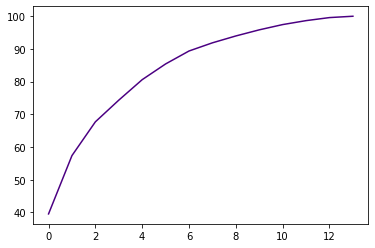

In [12]:
plt.plot(var1,color="indigo")

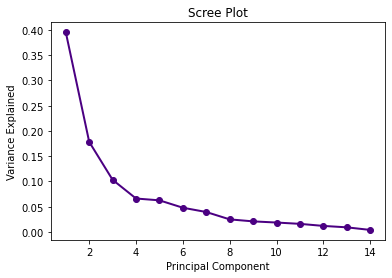

In [13]:
#Scree Plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='indigo')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

###### first 3 principal component scores

In [18]:
finaldf = pd.concat([pd.DataFrame(pca.fit_transform(df_normal)[:,0:3],columns=['pc1','pc2','pc3'])], axis = 1)

In [19]:
finaldf.head()

,pc1,pc2,pc3
0,-3.522934,-1.453098,-0.164795
1,-2.528858,0.330019,-2.026707
2,-2.785029,-1.036936,0.983238
3,-3.922588,-2.768210,-0.174968
4,-1.407511,-0.867773,2.025829


## Hierarchical Clustering

#### Original Data - DataFrame name "df"

In [20]:
# Normalization function 
def minmax_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [21]:
# Normalized data frame (considering the numerical part of data)
df_norm = minmax_func(df.iloc[:,1:])

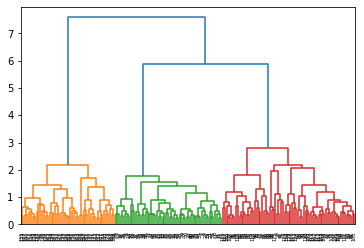

In [31]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='ward'))

###### From the above dendrogram, 4 clusters seem optimal as the cut-off distance is around 2.4

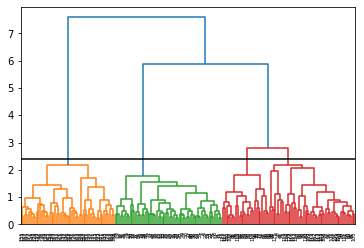

In [30]:
# create dendrogram
fig, ax = plt.subplots()
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='ward'))
threshold = 2.4 #for hline
ax.axhline(y=threshold, c='k')
plt.show()

#### Create Clusters

In [32]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward', compute_full_tree=True, distance_threshold=None)

In [33]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [34]:
Clusters.value_counts()

Clusters
2           57
0           50
1           46
3           25
dtype: int64

#### PCA Data - DataFrame name "finaldf"

In [35]:
# Normalized data frame (considering the numerical part of data)
df_norm = minmax_func(finaldf.iloc[:,1:])

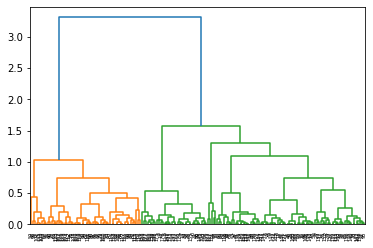

In [37]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='ward'))

###### From the above dendrogram, 4 clusters seem optimal as the cut-off distance is around 1.055

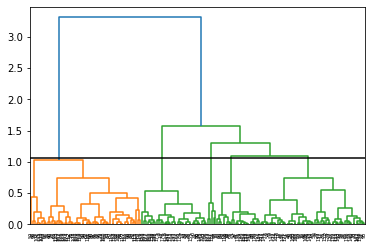

In [40]:
# create dendrogram
fig, ax = plt.subplots()
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='ward'))
threshold = 1.055 #for hline
ax.axhline(y=threshold, c='k')
plt.show()

#### Create Clusters

In [41]:
#distance_threshold=1.055
hc = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='ward', compute_full_tree=True, distance_threshold=1.055)

In [42]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [43]:
Clusters.value_counts()

Clusters
0           59
1           56
2           35
4           23
3            5
dtype: int64

###### Thus, 4 clusters for original data and 5 clusters for PCA

## KMeans

In [44]:
def norm_func(i):
    x = (i-i.mean())/(i.std())
    return (x)

In [45]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#### Original Data - DataFrame name "df"

C:\Users\shred\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


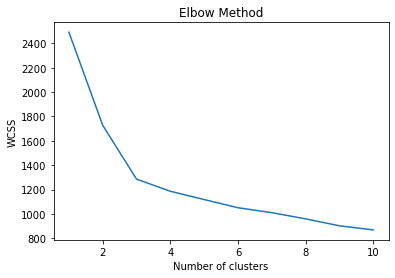

In [46]:
scaled_df = scaler.fit_transform(df)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [47]:
#Build Cluster algorithm. Number of clusters=3 from the above graph
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=0)
clusters_new.fit(scaled_df)

KMeans(n_clusters=3, random_state=0)

#### PCA Data - DataFrame name "finaldf"

C:\Users\shred\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


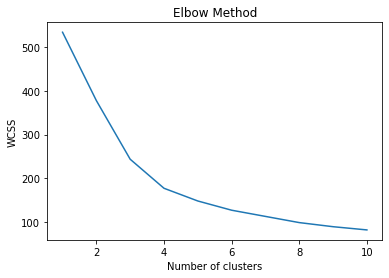

In [48]:
scaled_df = scaler.fit_transform(finaldf)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [49]:
#Build Cluster algorithm. Number of clusters=4 from the above graph
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=0)
clusters_new.fit(scaled_df)

KMeans(n_clusters=4, random_state=0)

###### Thus, 3 clusters for original data but 4 clusters for PCA data.